# Load MNIST Data 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('train.csv')

print(d0.head(5))

l=d0['label']
print(l)
d = d0.drop("label",axis=1)

    
        


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


C:\Users\mitta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


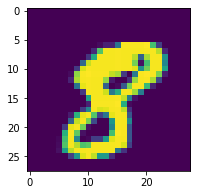

8


In [5]:
# display or plot a number.
plt.figure(figsize=(3,3))
idx = 10
grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none") #cmap='gray'
plt.show()

print(l[idx]) #label of that index.

target variable index 1


C:\Users\mitta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


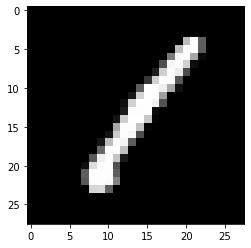

In [6]:
idx=0

grid_data=d.iloc[idx].as_matrix().reshape(28,28) 

plt.imshow(grid_data, interpolation="none",cmap="gray")
print('target variable index',l[idx])

#  2D Visualization using PCA 

In [7]:
labels = l.head(42000)
data = d.head(42000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (42000, 784)


In [8]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(42000, 784)


In [9]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [10]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(777,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 7)
Updated shape of eigen vectors =  (7, 784)


In [11]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (7, 784) X (784, 42000)  =  (7, 42000)


In [12]:
print(new_coordinates.shape)

(7, 42000)


In [13]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

print(new_coordinates)
print(new_coordinates.shape)
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal","3st_principal", "4nd_principal","5st_principal", "6nd_principal","7th _principal","label"))
print(dataframe.head())

[[-4.70694599 -2.03541345  4.92911094 ... -5.2264454  -5.14047772
   1.        ]
 [ 3.77279042  1.79109464  3.09518812 ...  6.03299601 19.29233234
   0.        ]
 [ 1.01200434  4.15205837  5.09442644 ... -1.70581328 -7.64450341
   1.        ]
 ...
 [ 2.12803518 -0.33044934  0.61820253 ...  7.07627667  0.49539137
   7.        ]
 [-0.18978856  5.49487523 -5.58647814 ... -4.34451279  2.30724011
   6.        ]
 [-1.19132491 -0.16818238 -1.04188691 ...  1.55912058 -4.80767022
   9.        ]]
(42000, 8)
   1st_principal  2nd_principal  3st_principal  4nd_principal  5st_principal  \
0      -4.706946      -2.035413       4.929111       0.901512      -3.887001   
1       3.772790       1.791095       3.095188       2.383294      -1.308148   
2       1.012004       4.152058       5.094426      -2.241135      -2.289326   
3      -4.398030      -2.179913       2.377777      -4.271106      -2.008617   
4       6.149597       2.331195       9.489179       3.012645      -0.933179   

   6nd_principal

C:\Users\mitta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


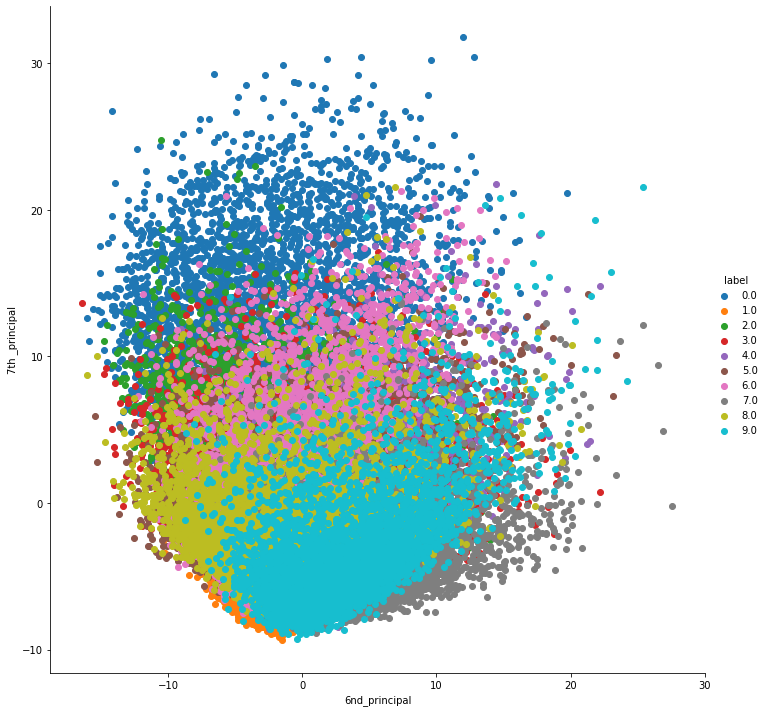

In [14]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=10).map(plt.scatter, '6nd_principal', '7th _principal').add_legend()

plt.show()

In [15]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [16]:
dataframe

,1st_principal,2nd_principal,3st_principal,4nd_principal,5st_principal,6nd_principal,7th _principal,label
0,-4.706946,-2.035413,4.929111,0.901512,-3.887001,-5.226445,-5.140478,1.0
1,3.772790,1.791095,3.095188,2.383294,-1.308148,6.032996,19.292332,0.0
2,1.012004,4.152058,5.094426,-2.241135,-2.289326,-1.705813,-7.644503,1.0
3,-4.398030,-2.179913,2.377777,-4.271106,-2.008617,5.836139,-0.474207,4.0
4,6.149597,2.331195,9.489179,3.012645,-0.933179,6.024818,26.559574,0.0
...,...,...,...,...,...,...,...,...
41995,-0.071920,5.105523,10.875898,5.379672,3.957336,-1.350366,13.678849,0.0
41996,0.351780,2.821950,5.798988,-1.528830,-2.323167,-1.187360,-8.869582,1.0
41997,2.128035,-0.330449,0.618203,3.223278,12.089700,7.076277,0.495391,7.0
41998,-0.189789,5.494875,-5.586478,-10.011222,-0.699848,-4.344513,2.307240,6.0


# PCA Plot in 3D Space

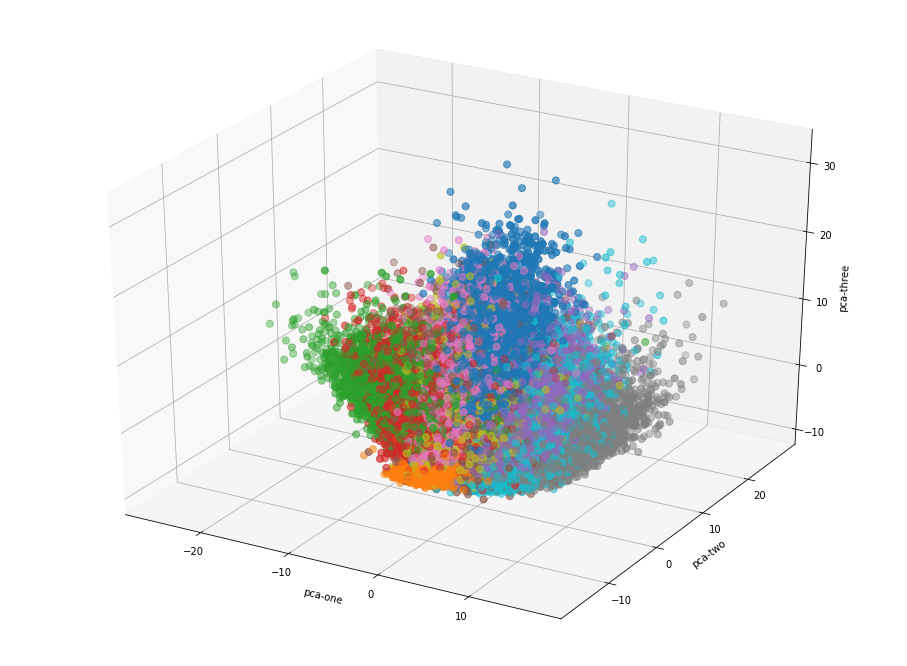

In [17]:
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=dataframe['5st_principal'], 
    ys=dataframe['6nd_principal'], 
    zs=dataframe['7th _principal'], 
    c=dataframe["label"], 
    cmap='tab10',s=50
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


# PCA using Scikit-Learn

In [18]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [19]:
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


In [20]:
print(pca_data)
pca_data.shape

[[-5.14047214 -5.22652208]
 [19.29233391  6.03281321]
 [-7.64451829 -1.70576597]
 ...
 [ 0.49535414  7.07656699]
 [ 2.30727437 -4.34496162]
 [-4.80769417  1.55959086]]


(42000, 2)

C:\Users\mitta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


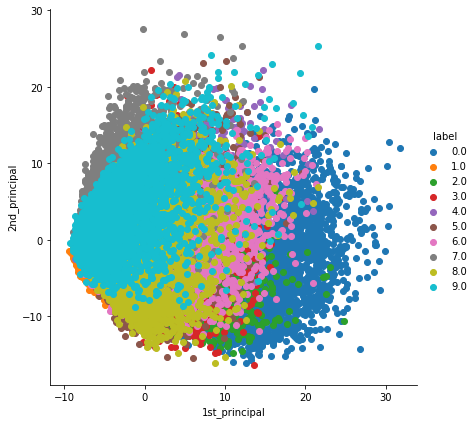

In [21]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution 
## No of Components vs Variance Explained.

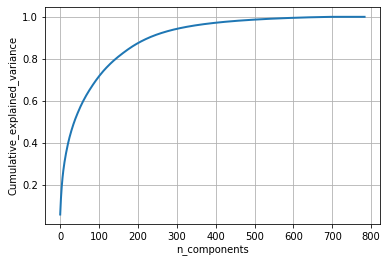

In [23]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

### Embedding(Definition) - Arrange points of various spaces and dimensionality space to a Lower Dimensional Space.

# t-SNE using Scikit-Learn

### (Other Techniques for dim reduction, Multi dimensional Scaling, Sammon Mapping, Graph-Based Techniques)

C:\Users\mitta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


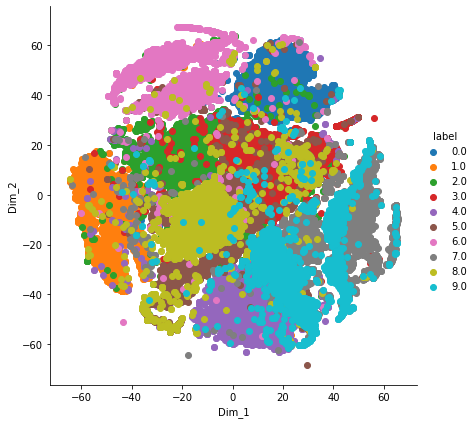

In [25]:
# TSNE

from sklearn.manifold import TSNE

data_1000 = standardized_data[0:42000,:]
labels_1000 = labels[0:42000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [31]:
print(tsne_data.T[1])
print(labels_1000.shape)

[-34.29153061  49.3771019    1.49512088 ... -13.19711781  51.82878113
 -40.69469452]
(42000,)


C:\Users\mitta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


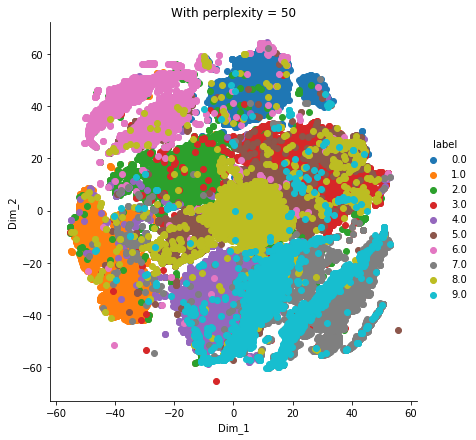

In [32]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

C:\Users\mitta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


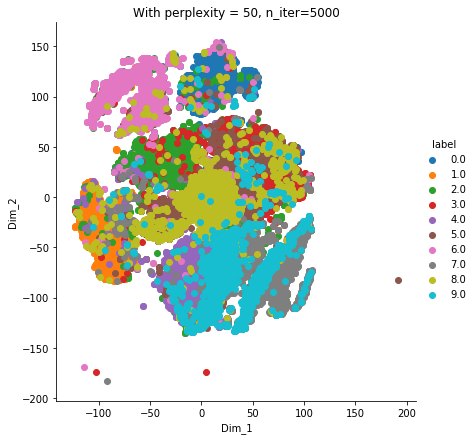

In [33]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

C:\Users\mitta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


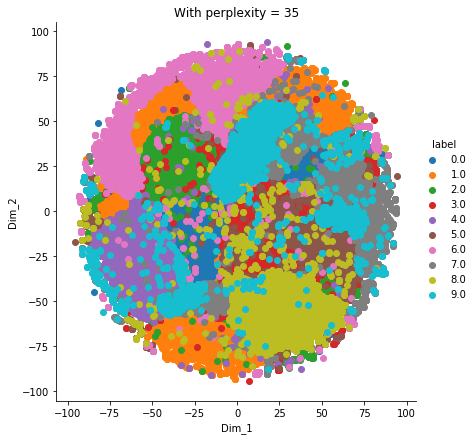

In [36]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 35')
plt.show()